<a href="https://colab.research.google.com/github/IaponaMother/Artificial_Neuron/blob/master/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 3s 0us/step


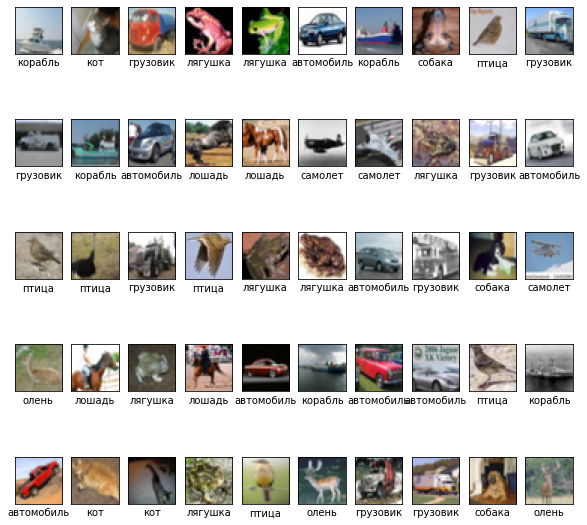

In [3]:
plt.figure(figsize = (10, 10))
for i in range(100, 150):
  plt.subplot(5, 10, i - 100 + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(classes[Y_train[i][0]])

In [4]:
x_train = X_train / 255
x_test = X_test / 255

In [5]:
y_train = utils.to_categorical(Y_train, 10)
y_test = utils.to_categorical(Y_test, 10)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape = (32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size  = 128, epochs = 25, validation_split = 0.1, verbose = 2)

Epoch 1/25
352/352 - 8s - loss: 1.6287 - accuracy: 0.4063 - val_loss: 1.2727 - val_accuracy: 0.5502 - 8s/epoch - 22ms/step
Epoch 2/25
352/352 - 7s - loss: 1.2291 - accuracy: 0.5603 - val_loss: 1.0584 - val_accuracy: 0.6202 - 7s/epoch - 20ms/step
Epoch 3/25
352/352 - 7s - loss: 1.0586 - accuracy: 0.6268 - val_loss: 0.9172 - val_accuracy: 0.6864 - 7s/epoch - 20ms/step
Epoch 4/25
352/352 - 7s - loss: 0.9531 - accuracy: 0.6654 - val_loss: 0.8160 - val_accuracy: 0.7202 - 7s/epoch - 20ms/step
Epoch 5/25
352/352 - 7s - loss: 0.8766 - accuracy: 0.6923 - val_loss: 0.7710 - val_accuracy: 0.7438 - 7s/epoch - 19ms/step
Epoch 6/25
352/352 - 7s - loss: 0.8124 - accuracy: 0.7134 - val_loss: 0.7603 - val_accuracy: 0.7426 - 7s/epoch - 20ms/step
Epoch 7/25
352/352 - 7s - loss: 0.7651 - accuracy: 0.7322 - val_loss: 0.7108 - val_accuracy: 0.7584 - 7s/epoch - 20ms/step
Epoch 8/25
352/352 - 7s - loss: 0.7183 - accuracy: 0.7463 - val_loss: 0.6983 - val_accuracy: 0.7592 - 7s/epoch - 21ms/step
Epoch 9/25
352/3

313/313 [==============================] - 2s 6ms/step - loss: 0.7001 - accuracy: 0.7766


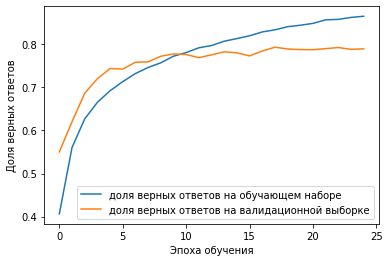

In [13]:
scores = model.evaluate(x_test, y_test, verbose = 1)

plt.plot(history.history['accuracy'], label = 'доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label = 'доля верных ответов на валидационной выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

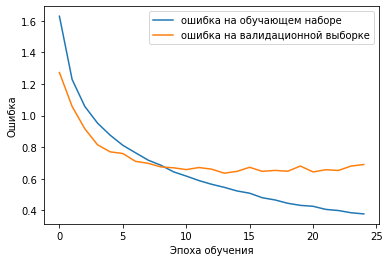

In [14]:
plt.plot(history.history['loss'], label = 'ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label = 'ошибка на валидационной выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [15]:
model.save("cifar10_model.h5")
!ls


cifar10_model.h5  sample_data


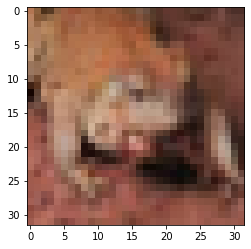

In [16]:
index = 5
plt.imshow(X_test[index])
plt.show()

In [18]:
x = x_test[index]
x = np.expand_dims(x, axis = 0)
prediction = np.argmax(model.predict(x))
print(classes[prediction])

лягушка


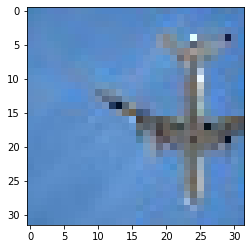

самолет


In [25]:
img = image.load_img('plane.jpg', target_size = (32, 32))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis = 0)
prediction = np.argmax(model.predict(x))
print(classes[prediction])
